# Table of Contents
 <p><div class="lev2"><a href="#imports-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>imports</a></div><div class="lev2"><a href="#TD-EOB-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>TD EOB</a></div><div class="lev3"><a href="#def-ifft2-0.2.1"><span class="toc-item-num">0.2.1&nbsp;&nbsp;</span>def ifft2</a></div>

## imports

In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import phenom
import numpy as np

import lal
import lalsimulation as lalsim

import myfft as fft
from helpers import *


## TD EOB

In [300]:
t={}; hp={}; hc={};
f={}; hptilde={}; hctilde={};

# t['lal'], hp['lal'], hc['lal'] = CallTDWaveform(approx="SEOBNRv3", chi1x=0.5, iota=0.,
#                                                 eta=0.16, srate=2**10, f_min=10., f_ref=10.)
t['lal'], hp['lal'], hc['lal'] = CallTDWaveform(approx="IMRPhenomPv2", chi1x=0., iota=0.,
                                                eta=0.16, srate=2**10, f_min=5., f_ref=10.)

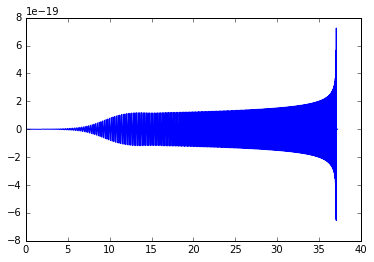

In [301]:
plt.figure()
plt.plot( t['lal'] , np.real( hp['lal'] ) )

In [302]:
# window and fft

# start_window = phenom.planck_taper( t['lal'], 0., 0. + 1. )
# end_window = 1. - phenom.planck_taper( t['lal'], 3.65, 3.65 + 0.5 )
start_window = phenom.planck_taper( t['lal'], 0., 0. + 4.5 )
# end_window = 1. - phenom.planck_taper( t['lal'], 7.65, 7.65 + 0.5 )
end_window = 1. - phenom.planck_taper( t['lal'], 37.65, 37.65 + 0.5 )

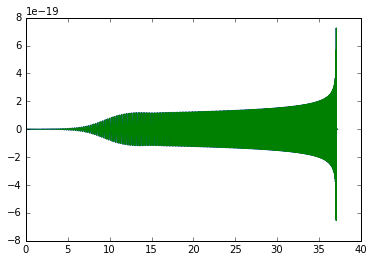

In [303]:
plt.figure()
plt.plot( t['lal'] , np.real( hp['lal'] ) )
plt.plot( t['lal'] , np.real( hp['lal'] ) * start_window * end_window)

In [332]:
phenom.pad_to_pow_2(np.asarray([1,2,3,4,5]),1)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  3.,  4.,  5.,  0.,  0.,
        0.,  0.,  0.])

In [334]:
phenom.pad_to_pow_2(hp['lal'],0)

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [322]:
#compute fft
f['my'], hptilde['my'] = fft.fft( t['lal'], hp['lal'] * start_window * end_window)

In [323]:
f['my'].shape

(38126,)

In [324]:
int(np.floor(len(f['my'])/2. + 1))

19064

In [325]:
f['my'][f['my']>=0].shape

(19063,)

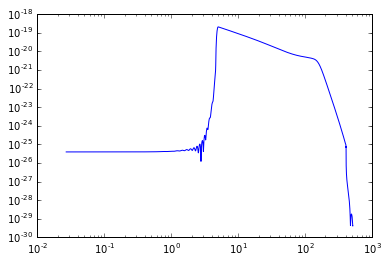

In [326]:
mask = f['my'] > 0
plt.figure()
plt.plot( f['my'][mask], np.abs( hptilde['my'][mask] ) )
plt.xscale('log')
plt.yscale('log')

In [327]:
# now windown and compute the ifft to compare to lal time domain

In [238]:
# start_window = phenom.planck_taper( f['my'][mask], 10., 10. + 1. )
start_window = phenom.planck_taper( f['my'][mask], 5., 5. + 1. )
end_window = 1. - phenom.planck_taper( f['my'][mask], 300., 300. + 1. )

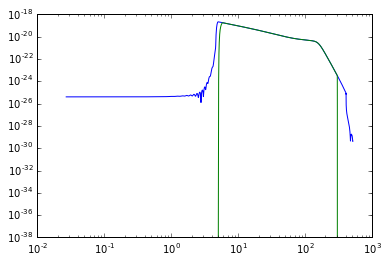

In [239]:
mask = f['my'] > 0
plt.figure()
plt.plot( f['my'][mask], np.abs( hptilde['my'][mask] ) )
plt.plot( f['my'][mask], np.abs( hptilde['my'][mask] ) * start_window * end_window )
plt.xscale('log')
plt.yscale('log')

In [240]:
print(f['my'][mask][0])

0.0268583119131


In [243]:
t['my'], hp['my'] = fft.myifft( f['my'],
                               hptilde['my'] * np.exp( -1.j * 2. * np.pi * f['my'] * 3.*np.pi),
                               f['my'][mask][0], 1. )

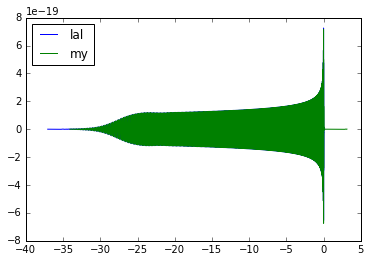

In [246]:
# %matplotlib notebook
# %matplotlib inline
plt.figure()
plt.plot( t['lal'] - t['lal'][peakindex(hp['lal'])], np.real( hp['lal'] ), label='lal' )
plt.plot( t['my']  - t['my'][peakindex(hp['my'])]  , np.real( hp['my']  ), label='my')
plt.legend(loc='best')
# plt.xlim(-0.1,0.1)

### def ifft2

In [248]:
def ifft2(f, htilde):

    N = len(f)

    df = f[1] - f[0]
    dt = 1.0 / ( df * N )

    # I am not sure what the factor of two is here...
    # FIXME: Is this factor of 2 correct or should it be somewhere else?
    h = 2 * fft.ifft(htilde) / dt
    maxTime = dt * N
    # print("highest time (maxTime) = {0}".format(maxTime))
    # print("dt = {0}".format(dt))
    t = np.arange( 0., maxTime, dt )

    return t, h

In [260]:
# start_window_ifft = phenom.planck_taper( f['my'][mask], 10., 10. + 5. )
start_window_ifft = phenom.planck_taper( f['my'][mask], 1., 1. + 5. )
# end_window_ifft = 1. - phenom.planck_taper( f['my'][mask], 300., 300. + 100. )

In [269]:
# hptilde_toifft = hptilde['my'][mask] * start_window_ifft * end_window_ifft
hptilde_toifft = hptilde['my'][mask] * start_window_ifft
# hptilde_toifft = phenom.pad_to_pow_2(hptilde_toifft, 2)
# hptilde_toifft = hptilde['my']

In [279]:
t['ifft2'], hp['ifft2'] = ifft2( f['my'][mask],
                          hptilde_toifft)

# t['ifft2'], hp['ifft2'] = ifft2( phenom.pad_to_pow_2(f['my'][mask],0),
#                           phenom.pad_to_pow_2(hptilde_toifft,0))

(-0.1, 0.1)

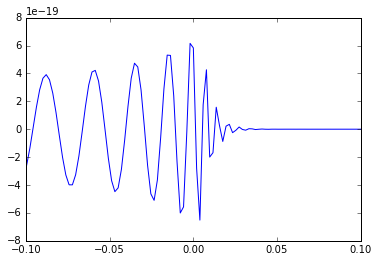

In [280]:
# %matplotlib notebook
# %matplotlib inline
plt.figure()
plt.plot( t['ifft2'] - t['ifft2'][peakindex(hp['ifft2'])], np.real( hp['ifft2'] ))
plt.legend(loc='best')
plt.xlim(-0.1,0.1)